In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from auxiliar import *

import matplotlib.pyplot as plt


# EDA

We start off, as usual, by reading the csv into a dataframe.

In [2]:
data = pd.read_csv('data.csv')

data

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


## EDA

The initial problem is composed of 400 observations and 50 explanatory variables. Some variables are in different orders of magnitude, so we might need to scale them in the future in order to have accurate classifications.

In [3]:
print(data["Class"].unique())

['relax' 'happy' 'sad' 'angry']


Our target variable is categorical and has four distinct values, which correspond to basic emotions.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

All of our variables appear to be continuous  since they all have (apart from our Class) dtype = float64

In [5]:

for s in data.columns:
    if data[s].isnull().any():
        print("Has null values")
        break
print("No null values")

No null values


It also seems that we have no missing values.

Now is a good time to analyze correlation. To do that we have to first drop our class variable.

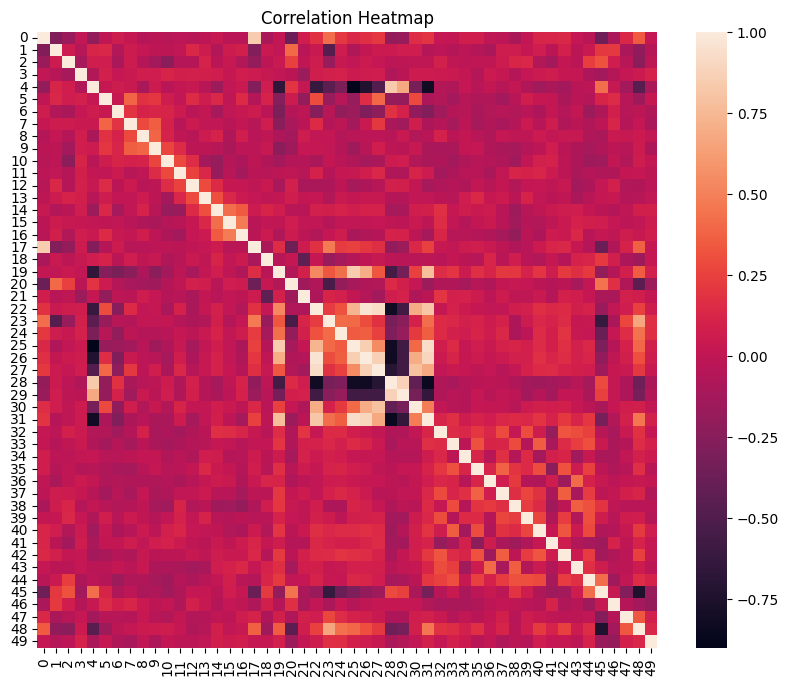

In [6]:

target = data["Class"]
df = data.drop("Class", axis=1)
df_corr = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df_corr, xticklabels=range(len(df_corr)), yticklabels=range(len(df_corr)))

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

Some of our variables appear to be correlated.

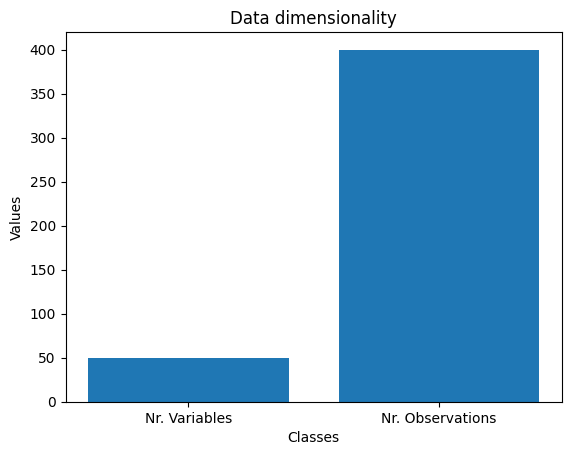

In [7]:
# Define the data
values = [len(df.columns), len(df)]
labels = ['Nr. Variables', 'Nr. Observations']

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(labels, values)

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Data dimensionality')

# Display the plot
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()

classes = ohe.fit_transform(pd.DataFrame(target)).toarray()
classes.sum(axis=0)

array([100., 100., 100., 100.])

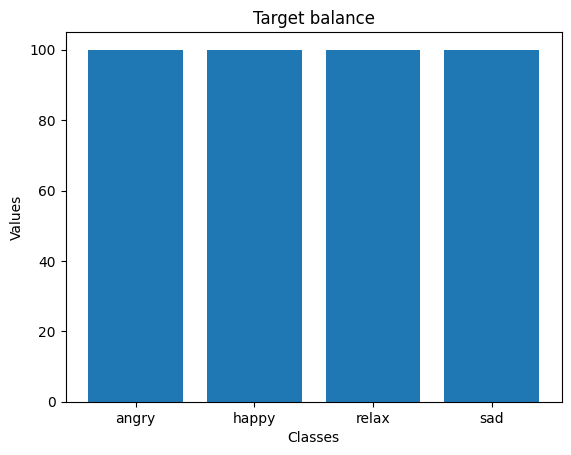

In [10]:
# Define the data
values = classes.sum(axis=0)
labels = ['angry', 'happy', 'relax', 'sad']

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(labels, values)

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Target balance')

# Display the plot
plt.show()


The observations in each class is identical.

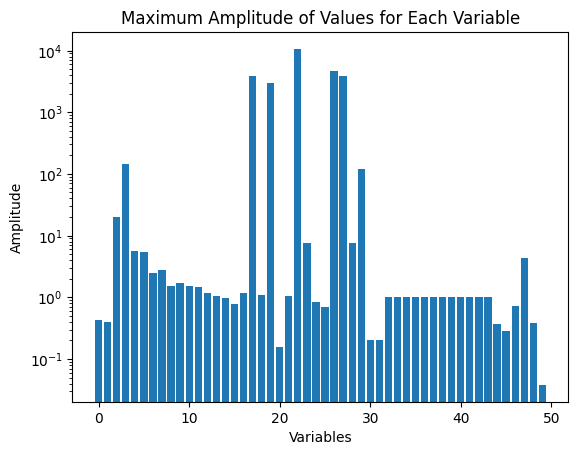

In [11]:
# Get the maximum and minimum values for each variable
var_max = df.max()
var_min = df.min()

# Calculate the amplitude for each variable
amplitude = var_max - var_min

# Create the bar plot
plt.bar(range(len(amplitude.values)), amplitude.values)

plt.yscale('log')

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Amplitude')
plt.title('Maximum Amplitude of Values for Each Variable')

# Display the plot
plt.show()

Again, our variables appear to be in different orders of magnitude.

## Transformations

We proceed by scaling our variables to the mean because mutual information is invariant to scaling and we need scaled variables to use kNN classifier with euclidean metric.

We also split our data set into training and testing sets.

In [12]:
seed = 95758

# scale the data
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets. (0.75, 0.25) split.
train_df, test_df, train_target, test_target = train_test_split(df, target, test_size=0.25, random_state=seed)

scaler = StandardScaler().fit(train_df)

train_df = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

# Forward Feature Selection

We implement forward feature selection based on information theory using four objective functions: MIM, MIFS, mRMR and maxMIFS.

Forward Feature Selection is a function implemented in auxiliar.py.

MIFS, mRMR and maxMIFS were also implemented since python doesn't have libraries that support these objective functions.

## MIM

In [13]:
sort = ffs(train_df, train_target, MIM)

train_df_MIM_15 = train_df[sort[:15]]
test_df_MIM_15 = test_df[sort[:15]]

train_df_MIM_25 = train_df[sort[:25]]
test_df_MIM_25 = test_df[sort[:25]]


In [14]:
train_df[sort]

,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp,_Zero-crossingrate_Mean,_Eventdensity_Mean,_EntropyofSpectrum_Mean,_Pulseclarity_Mean,_Fluctuation_Mean,_AttackTime_Mean,_Brightness_Mean,_MFCC_Mean_1,...,_Roughness_Mean,_MFCC_Mean_9,_MFCC_Mean_5,_Chromagram_Mean_2,_MFCC_Mean_10,_Chromagram_Mean_5,_Chromagram_Mean_8,_Spectralflatness_Mean,_Chromagram_Mean_10,_Chromagram_Mean_11
0,-0.192271,0.180948,0.962092,0.681610,0.996544,-0.884394,-0.112890,-0.574799,1.035938,-0.591791,...,0.200861,0.070240,-0.697373,-0.459010,0.105015,-0.613211,-0.681079,0.126548,1.175778,-0.537072
1,1.692877,-1.135298,-0.391453,-1.165542,-0.368834,-0.961508,0.387767,3.472458,-0.710622,0.830849,...,-1.090610,-0.708722,-0.649469,-0.527147,-1.303912,-0.518630,-0.610451,0.238427,-0.780551,-0.955269
2,-0.127266,0.325590,2.303700,-0.648634,1.078467,-0.428134,-0.346360,-0.176708,1.696593,-1.591927,...,-0.913685,0.496339,0.367156,2.358484,-0.335275,2.044840,-0.339711,-1.104123,-0.870239,-0.868413
3,1.584535,-0.455479,-0.806783,-0.549825,-0.914985,-0.839410,1.387374,-0.110360,-0.885278,0.514286,...,-0.402420,-0.076232,-0.888988,0.024768,0.938178,1.245794,0.095828,0.163841,1.175778,-0.578892
4,0.826142,-0.224051,-0.706704,-0.451015,-0.396142,-0.241775,0.770196,0.752170,-0.816935,0.732475,...,0.232227,-0.555593,0.787645,-0.332955,0.240488,0.058640,-0.213169,-1.104123,-0.191971,-0.311889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.912816,-0.209587,0.733476,-0.476086,0.204625,-0.839410,-0.661351,0.088686,0.709407,-0.205862,...,-0.045571,-0.449068,-1.713997,-0.922346,0.314999,-0.260978,-0.613394,-0.619313,1.175778,-0.604627
296,0.089418,-0.079409,-0.392834,-0.377276,0.313855,-0.061841,0.056129,0.354080,0.063939,-0.316848,...,-0.223880,0.969042,-0.239625,-0.878056,0.321773,-0.851294,-1.007734,-0.358262,1.175778,-1.064644
297,-0.733980,-0.007087,-0.035177,0.386656,0.532315,-0.299610,-1.108657,-0.972890,0.511970,-0.591791,...,-0.438018,-1.261319,-0.660114,-0.854208,-0.802659,-0.939352,-0.601623,-0.022624,1.175778,-0.897365
298,-0.018924,0.629339,2.297586,0.740601,1.051159,1.024185,-0.042892,-0.176708,1.681406,-1.402746,...,0.444238,-0.975034,1.218779,0.191705,-0.897491,2.116592,-0.666365,-0.470141,-0.371347,-0.997089


## MIFS

In [15]:
sort = ffs(train_df, train_target, MIFS, beta = 0.5)

train_df_MIFS_15 = train_df[sort[:15]]
test_df_MIFS_15 = test_df[sort[:15]]

train_df_MIFS_25 = train_df[sort[:25]]
test_df_MIFS_25 = test_df[sort[:25]]

In [16]:
train_df[sort]

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_MFCC_Mean_13,_Chromagram_Mean_6,_Fluctuation_Mean,_MFCC_Mean_6,_Tempo_Mean,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,...,_HarmonicChangeDetectionFunction_PeriodAmp,_Spectralskewness_Mean,_Roughness_Mean,_Eventdensity_Mean,_Spectralspread_Mean,_MFCC_Mean_1,_EntropyofSpectrum_Mean,_Spectralkurtosis_Mean,_Brightness_Mean,_Rolloff_Mean
0,-0.192271,0.962092,0.082009,-1.898956,-0.559242,-0.112890,-1.354964,-1.916880,0.098075,-0.721591,...,0.180948,-0.262276,0.200861,0.681610,0.188330,-0.591791,0.996544,-0.234514,1.035938,0.289948
1,1.692877,-0.391453,0.158604,-1.597333,0.355427,0.387767,0.035776,-1.681587,-0.170448,-0.308416,...,-1.135298,0.362380,-1.090610,-1.165542,-0.724220,0.830849,-0.368834,0.108463,-0.710622,-0.510500
2,-0.127266,2.303700,-0.400545,-1.581458,-0.522116,-0.346360,-0.377023,1.000322,-0.534871,-0.101828,...,0.325590,-1.199858,-0.913685,-0.648634,-0.587480,-1.591927,1.078467,-0.515208,1.696593,0.348958
3,1.584535,-0.806783,1.230945,0.958527,-0.896759,1.387374,0.487889,-1.688531,0.433728,-1.568932,...,-0.455479,-0.193003,-0.402420,-0.549825,0.862010,0.514286,-0.914985,-0.281679,-0.885278,0.449196
4,0.826142,-0.706704,-0.404375,0.680716,-0.717875,0.770196,-0.553937,1.678105,0.011764,-0.308416,...,-0.224051,0.665751,0.232227,-0.451015,-1.344905,0.732475,-0.396142,0.300147,-0.816935,-1.074245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.912816,0.733476,-1.714163,-0.176529,0.341927,-0.661351,0.463318,-1.391764,-0.333479,1.012861,...,-0.209587,0.266831,-0.045571,-0.476086,-1.148666,-0.205862,0.204625,0.133738,0.709407,-0.848413
296,0.089418,-0.392834,-0.546077,0.172719,-0.900134,0.056129,0.443661,-0.698728,0.644710,0.163311,...,-0.079409,-0.385296,-0.223880,-0.377276,0.059618,-0.316848,0.313855,-0.301755,0.063939,0.143506
297,-0.733980,-0.035177,0.231370,0.172719,-0.765127,-1.108657,-0.116567,-0.162689,-0.218398,-0.816599,...,-0.007087,-0.392463,-0.438018,0.386656,0.155546,-0.591791,0.532315,-0.290629,0.511970,0.211850
298,-0.018924,2.297586,-1.005652,-0.240029,0.973083,-0.042892,-0.519537,-0.276108,-0.151268,0.163311,...,0.629339,-0.587145,0.444238,0.740601,-0.266382,-1.402746,1.051159,-0.305867,1.681406,0.207523


## mRMR

In [17]:
sort = ffs(train_df, train_target, mRMR)

train_df_mRMR_15 = train_df[sort[:15]]
test_df_mRMR_15 = test_df[sort[:15]]

train_df_mRMR_25 = train_df[sort[:25]]
test_df_mRMR_25 = test_df[sort[:25]]

In [18]:
train_df[sort]

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_HarmonicChangeDetectionFunction_PeriodAmp,_Fluctuation_Mean,_Pulseclarity_Mean,_HarmonicChangeDetectionFunction_Mean,_AttackTime_Mean,_EntropyofSpectrum_Mean,_Chromagram_Mean_6,...,_Rolloff_Mean,_Chromagram_Mean_5,_Chromagram_Mean_2,_Chromagram_Mean_8,_Chromagram_Mean_10,_Roughness_Mean,_Chromagram_Mean_11,_Spectralflatness_Mean,_Spectralkurtosis_Mean,_Spectralspread_Mean
0,-0.192271,0.962092,0.082009,0.180948,-0.112890,-0.884394,0.262842,-0.574799,0.996544,-0.559242,...,0.289948,-0.613211,-0.459010,-0.681079,1.175778,0.200861,-0.537072,0.126548,-0.234514,0.188330
1,1.692877,-0.391453,0.158604,-1.135298,0.387767,-0.961508,1.026107,3.472458,-0.368834,0.355427,...,-0.510500,-0.518630,-0.527147,-0.610451,-0.780551,-1.090610,-0.955269,0.238427,0.108463,-0.724220
2,-0.127266,2.303700,-0.400545,0.325590,-0.346360,-0.428134,0.626302,-0.176708,1.078467,-0.522116,...,0.348958,2.044840,2.358484,-0.339711,-0.870239,-0.913685,-0.868413,-1.104123,-0.515208,-0.587480
3,1.584535,-0.806783,1.230945,-0.455479,1.387374,-0.839410,1.662162,-0.110360,-0.914985,-0.896759,...,0.449196,1.245794,0.024768,0.095828,1.175778,-0.402420,-0.578892,0.163841,-0.281679,0.862010
4,0.826142,-0.706704,-0.404375,-0.224051,0.770196,-0.241775,0.808031,0.752170,-0.396142,-0.717875,...,-1.074245,0.058640,-0.332955,-0.213169,-0.191971,0.232227,-0.311889,-1.104123,0.300147,-1.344905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.912816,0.733476,-1.714163,-0.209587,-0.661351,-0.839410,0.935242,0.088686,0.204625,0.341927,...,-0.848413,-0.260978,-0.922346,-0.613394,1.175778,-0.045571,-0.604627,-0.619313,0.133738,-1.148666
296,0.089418,-0.392834,-0.546077,-0.079409,0.056129,-0.061841,0.208323,0.354080,0.313855,-0.900134,...,0.143506,-0.851294,-0.878056,-1.007734,1.175778,-0.223880,-1.064644,-0.358262,-0.301755,0.059618
297,-0.733980,-0.035177,0.231370,-0.007087,-1.108657,-0.299610,-1.227343,-0.972890,0.532315,-0.765127,...,0.211850,-0.939352,-0.854208,-0.601623,1.175778,-0.438018,-0.897365,-0.022624,-0.290629,0.155546
298,-0.018924,2.297586,-1.005652,0.629339,-0.042892,1.024185,1.353221,-0.176708,1.051159,0.973083,...,0.207523,2.116592,0.191705,-0.666365,-0.371347,0.444238,-0.997089,-0.470141,-0.305867,-0.266382


## MaxMIFS

In [19]:
sort = ffs(train_df, train_target, maxMIFS)

train_df_maxMIFS_15 = train_df[sort[:15]]
test_df_maxMIFS_15 = test_df[sort[:15]]

train_df_maxMIFS_25 = train_df[sort[:25]]
test_df_maxMIFS_25 = test_df[sort[:25]]

In [20]:
train_df[sort]

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_AttackTime_Mean,_MFCC_Mean_13,_Chromagram_Mean_6,_MFCC_Mean_7,_Pulseclarity_Mean,_Fluctuation_Mean,_MFCC_Mean_6,...,_Spectralskewness_Mean,_Chromagram_Mean_5,_MFCC_Mean_1,_EntropyofSpectrum_Mean,_Spectralspread_Mean,_Rolloff_Mean,_Roughness_Mean,_Brightness_Mean,_Spectralcentroid_Mean,_Spectralkurtosis_Mean
0,-0.192271,0.962092,0.082009,-0.574799,-1.898956,-0.559242,-0.003610,-0.884394,-0.112890,-1.354964,...,-0.262276,-0.613211,-0.591791,0.996544,0.188330,0.289948,0.200861,1.035938,0.516540,-0.234514
1,1.692877,-0.391453,0.158604,3.472458,-1.597333,0.355427,0.185218,-0.961508,0.387767,0.035776,...,0.362380,-0.518630,0.830849,-0.368834,-0.724220,-0.510500,-1.090610,-0.710622,-0.646282,0.108463
2,-0.127266,2.303700,-0.400545,-0.176708,-1.581458,-0.522116,-0.731152,-0.428134,-0.346360,-0.377023,...,-1.199858,2.044840,-1.591927,1.078467,-0.587480,0.348958,-0.913685,1.696593,0.821024,-0.515208
3,1.584535,-0.806783,1.230945,-0.110360,0.958527,-0.896759,-0.053594,-0.839410,1.387374,0.487889,...,-0.193003,1.245794,0.514286,-0.914985,0.862010,0.449196,-0.402420,-0.885278,-0.116885,-0.281679
4,0.826142,-0.706704,-0.404375,0.752170,0.680716,-0.717875,0.412922,-0.241775,0.770196,-0.553937,...,0.665751,0.058640,0.732475,-0.396142,-1.344905,-1.074245,0.232227,-0.816935,-1.150208,0.300147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.912816,0.733476,-1.714163,0.088686,-0.176529,0.341927,0.079696,-0.839410,-0.661351,0.463318,...,0.266831,-0.260978,-0.205862,0.204625,-1.148666,-0.848413,-0.045571,0.709407,-0.407896,0.133738
296,0.089418,-0.392834,-0.546077,0.354080,0.172719,-0.900134,0.129680,-0.061841,0.056129,0.443661,...,-0.385296,-0.851294,-0.316848,0.313855,0.059618,0.143506,-0.223880,0.063939,-0.012401,-0.301755
297,-0.733980,-0.035177,0.231370,-0.972890,0.172719,-0.765127,0.212986,-0.299610,-1.108657,-0.116567,...,-0.392463,-0.939352,-0.591791,0.532315,0.155546,0.211850,-0.438018,0.511970,0.214046,-0.290629
298,-0.018924,2.297586,-1.005652,-0.176708,-0.240029,0.973083,-0.192438,1.024185,-0.042892,-0.519537,...,-0.587145,2.116592,-1.402746,1.051159,-0.266382,0.207523,0.444238,1.681406,0.739803,-0.305867


# Classification

Remember the variables were previously scaled, so we can use euclidean metric without worry.

## KNN = 5

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Since we are dealing with kNN we should scale the data

knn_MIM_15 = kNN.fit(train_df_MIM_15, train_target)
pred_MIM_15 = knn_MIM_15.predict(test_df_MIM_15)

knn_MIM_25 = kNN.fit(train_df_MIM_25, train_target)
pred_MIM_25 = knn_MIM_25.predict(test_df_MIM_25)

knn_MIFS_15 = kNN.fit(train_df_MIFS_15, train_target)
pred_MIFS_15 = knn_MIFS_15.predict(test_df_MIFS_15)

knn_MIFS_25 = kNN.fit(train_df_MIFS_25, train_target)
pred_MIFS_25 = knn_MIFS_25.predict(test_df_MIFS_25)

knn_mRMR_15 = kNN.fit(train_df_mRMR_15, train_target)
pred_mRMR_15 = knn_mRMR_15.predict(test_df_mRMR_15)

knn_mRMR_25 = kNN.fit(train_df_mRMR_25, train_target)
pred_mRMR_25 = knn_mRMR_25.predict(test_df_mRMR_25)

knn_maxMIFS_15 = kNN.fit(train_df_maxMIFS_15, train_target)
pred_maxMIFS_15 = knn_maxMIFS_15.predict(test_df_maxMIFS_15)

knn_maxMIFS_25 = kNN.fit(train_df_maxMIFS_25, train_target)
pred_maxMIFS_25 = knn_maxMIFS_25.predict(test_df_maxMIFS_25)

# Evaluate
acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_15)
print("MIM 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_25)
print("MIM 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_15)
print("MIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_25)
print("MIFS 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_15)
print("mRMR 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_25)
print("mRMR 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_15)
print("maxMIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_25)
print("maxMIFS 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)


MIM 15: Accuracy:  0.8100  Macro_Recall:  0.8175  Macro_Precision:  0.8418  Macro_F1:  0.8257
MIM 25: Accuracy:  0.7300  Macro_Recall:  0.7473  Macro_Precision:  0.7324  Macro_F1:  0.7360
MIFS 15: Accuracy:  0.6300  Macro_Recall:  0.6462  Macro_Precision:  0.6161  Macro_F1:  0.6218
MIFS 25: Accuracy:  0.6400  Macro_Recall:  0.6596  Macro_Precision:  0.6396  Macro_F1:  0.6220
mRMR 15: Accuracy:  0.7700  Macro_Recall:  0.7825  Macro_Precision:  0.7771  Macro_F1:  0.7769
mRMR 25: Accuracy:  0.7200  Macro_Recall:  0.7356  Macro_Precision:  0.7084  Macro_F1:  0.7145
maxMIFS 15: Accuracy:  0.6800  Macro_Recall:  0.6915  Macro_Precision:  0.6917  Macro_F1:  0.6835
maxMIFS 25: Accuracy:  0.7300  Macro_Recall:  0.7452  Macro_Precision:  0.7169  Macro_F1:  0.7212


/home/nuno/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/nuno/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

## SVM



In [22]:
from sklearn import svm

svm = svm.SVC(decision_function_shape='ovo', kernel='linear')

svm_MIM_15 = svm.fit(train_df_MIM_15, train_target)
pred_MIM_15 = svm_MIM_15.predict(test_df_MIM_15)

svm_MIM_25 = svm.fit(train_df_MIM_25, train_target)
pred_MIM_25 = svm_MIM_25.predict(test_df_MIM_25)

svm_MIFS_15 = svm.fit(train_df_MIFS_15, train_target)
pred_MIFS_15 = svm_MIFS_15.predict(test_df_MIFS_15)

svm_MIFS_25 = svm.fit(train_df_MIFS_25, train_target)
pred_MIFS_25 = svm_MIFS_25.predict(test_df_MIFS_25)

svm_mRMR_15 = svm.fit(train_df_mRMR_15, train_target)
pred_mRMR_15 = svm_mRMR_15.predict(test_df_mRMR_15)

svm_mRMR_25 = svm.fit(train_df_mRMR_25, train_target)
pred_mRMR_25 = svm_mRMR_25.predict(test_df_mRMR_25)

svm_maxMIFS_15 = svm.fit(train_df_maxMIFS_15, train_target)
pred_maxMIFS_15 = svm_maxMIFS_15.predict(test_df_maxMIFS_15)

svm_maxMIFS_25 = svm.fit(train_df_maxMIFS_25, train_target)
pred_maxMIFS_25 = svm_maxMIFS_25.predict(test_df_maxMIFS_25)

# Evaluate
acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_15)
print("MIM 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_25)
print("MIM 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_15)
print("MIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_25)
print("MIFS 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_15)
print("mRMR 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_25)
print("mRMR 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_15)
print("maxMIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_25)
print("maxMIFS 25: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

MIM 15: Accuracy:  0.7700  Macro_Recall:  0.7802  Macro_Precision:  0.7922  Macro_F1:  0.7839
MIM 25: Accuracy:  0.8000  Macro_Recall:  0.8068  Macro_Precision:  0.8218  Macro_F1:  0.8089
MIFS 15: Accuracy:  0.7400  Macro_Recall:  0.7533  Macro_Precision:  0.7507  Macro_F1:  0.7507
MIFS 25: Accuracy:  0.6800  Macro_Recall:  0.6923  Macro_Precision:  0.6894  Macro_F1:  0.6904
mRMR 15: Accuracy:  0.8100  Macro_Recall:  0.8175  Macro_Precision:  0.8257  Macro_F1:  0.8203
mRMR 25: Accuracy:  0.7900  Macro_Recall:  0.7974  Macro_Precision:  0.7976  Macro_F1:  0.7972
maxMIFS 15: Accuracy:  0.7100  Macro_Recall:  0.7214  Macro_Precision:  0.7195  Macro_F1:  0.7195
maxMIFS 25: Accuracy:  0.7700  Macro_Recall:  0.7767  Macro_Precision:  0.7815  Macro_F1:  0.7771


In [23]:
from sklearn.decomposition import PCA, SparsePCA

In [31]:
pca = PCA(n_components=50)
pca.fit(train_df)
pca_data = pca.transform(train_df)

In [32]:
len(pca.components_)

50

In [33]:
cum_var_ratio = [sum(pca.explained_variance_ratio_[:x+1]) for x in range(len(pca.explained_variance_ratio_))]

In [34]:
cum_var_ratio

[0.17352178924559455,
 0.24791624924921699,
 0.31339382598469556,
 0.36286371194151085,
 0.40694382670228196,
 0.44796770295044325,
 0.48247598366552413,
 0.5155912731506973,
 0.5457315018175762,
 0.5742250477893337,
 0.6012413299217767,
 0.6267176724825858,
 0.6506683863068903,
 0.673573796813479,
 0.6955129036622987,
 0.7160668317918337,
 0.7353929336486946,
 0.7537211851533494,
 0.7713515430320464,
 0.7886503338547428,
 0.8044612561937395,
 0.8189378360551439,
 0.8333408495546797,
 0.8474930097856315,
 0.8608171359674776,
 0.8736464037320469,
 0.8851731140007978,
 0.8960781923619161,
 0.9065449907643393,
 0.9163818232921208,
 0.9254960957165393,
 0.9342838626574975,
 0.9424836666736298,
 0.9498617719977595,
 0.9568526628569327,
 0.9632611892542394,
 0.9695754289173756,
 0.975082250185215,
 0.9801727890842219,
 0.984614338472486,
 0.9887525428773564,
 0.9921349638176359,
 0.9946421461347692,
 0.9963657349980971,
 0.9977825249783754,
 0.9986508026907277,
 0.99940431892493,
 0.99972316

In [35]:
pca.explained_variance_ratio_

array([1.73521789e-01, 7.43944600e-02, 6.54775767e-02, 4.94698860e-02,
       4.40801148e-02, 4.10238762e-02, 3.45082807e-02, 3.31152895e-02,
       3.01402287e-02, 2.84935460e-02, 2.70162821e-02, 2.54763426e-02,
       2.39507138e-02, 2.29054105e-02, 2.19391068e-02, 2.05539281e-02,
       1.93261019e-02, 1.83282515e-02, 1.76303579e-02, 1.72987908e-02,
       1.58109223e-02, 1.44765799e-02, 1.44030135e-02, 1.41521602e-02,
       1.33241262e-02, 1.28292678e-02, 1.15267103e-02, 1.09050784e-02,
       1.04667984e-02, 9.83683253e-03, 9.11427242e-03, 8.78776694e-03,
       8.19980402e-03, 7.37810532e-03, 6.99089086e-03, 6.40852640e-03,
       6.31423966e-03, 5.50682127e-03, 5.09053890e-03, 4.44154939e-03,
       4.13820440e-03, 3.38242094e-03, 2.50718232e-03, 1.72358886e-03,
       1.41678998e-03, 8.68277712e-04, 7.53516234e-04, 3.18842141e-04,
       1.97501740e-04, 7.93371944e-05])

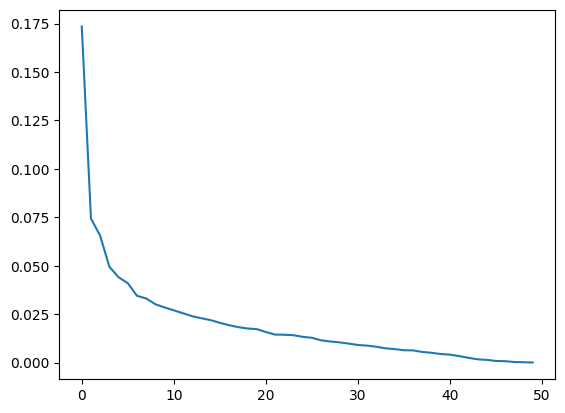

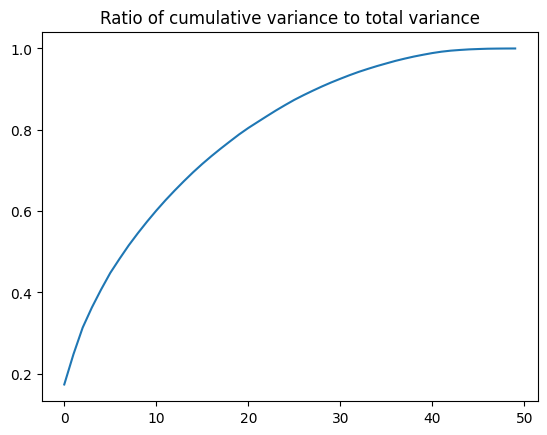

In [36]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
plt.plot(cum_var_ratio)
plt.title("Ratio of cumulative variance to total variance")
plt.show()

In [37]:
pca_data

array([[-1.64859688e+00, -1.94563494e-01, -5.97240091e-01, ...,
         2.96777602e-02,  1.93567121e-02,  8.43557745e-02],
       [ 2.92026111e+00,  3.51266715e+00,  1.76374594e+00, ...,
         1.45436298e-01, -1.13913562e-01,  1.43630844e-02],
       [-2.25030392e+00,  1.20593738e+00,  3.70787278e+00, ...,
        -5.61322612e-02,  2.33546742e-03,  5.05061940e-02],
       ...,
       [-8.30032314e-01, -4.06939357e-01, -1.80080945e+00, ...,
         3.95542520e-02,  2.46155393e-02,  1.14375657e-02],
       [-3.03268130e+00, -6.39709334e-01,  2.89743166e+00, ...,
        -7.71962210e-02,  1.05591455e-03,  9.18814287e-02],
       [ 7.70933073e+00, -2.28951119e+00, -1.50486695e+00, ...,
        -2.82413448e-01, -2.03705852e-01,  4.86655271e-02]])

In [38]:
from sklearn.svm import SVC

accuracies = []
macro_recalls = []
macro_precisions = []
macro_f1s = []

for k in range(2, 51, 4):
        pca = SparsePCA(n_components=k)
        pca.fit(train_df)
        pca_data = pca.transform(train_df)
        #pca_target = pca.transform(train_target)
        pca_test = pca.transform(test_df)

        svm = SVC()

        svm_pca = svm.fit(pca_data, train_target)
        pred_pca = svm.predict(pca_test)

        acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_pca)
        accuracies.append(acc)
        macro_recalls.append(macro_rec)
        macro_precisions.append(macro_pre)
        macro_f1s.append(macro_f1)
        print("%d: Accuracy: " %k, "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
                "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

2: Accuracy:  0.5200  Macro_Recall:  0.5444  Macro_Precision:  0.5513  Macro_F1:  0.5090
6: Accuracy:  0.6900  Macro_Recall:  0.7056  Macro_Precision:  0.7062  Macro_F1:  0.7000
10: Accuracy:  0.7400  Macro_Recall:  0.7461  Macro_Precision:  0.7444  Macro_F1:  0.7451
14: Accuracy:  0.7200  Macro_Recall:  0.7316  Macro_Precision:  0.7350  Macro_F1:  0.7280
18: Accuracy:  0.7300  Macro_Recall:  0.7412  Macro_Precision:  0.7415  Macro_F1:  0.7370
22: Accuracy:  0.8100  Macro_Recall:  0.8191  Macro_Precision:  0.8260  Macro_F1:  0.8182
26: Accuracy:  0.7800  Macro_Recall:  0.7923  Macro_Precision:  0.8009  Macro_F1:  0.7879
30: Accuracy:  0.7600  Macro_Recall:  0.7731  Macro_Precision:  0.7754  Macro_F1:  0.7661
34: Accuracy:  0.7900  Macro_Recall:  0.7999  Macro_Precision:  0.8067  Macro_F1:  0.7983
38: Accuracy:  0.7800  Macro_Recall:  0.7910  Macro_Precision:  0.7982  Macro_F1:  0.7884
42: Accuracy:  0.7800  Macro_Recall:  0.7910  Macro_Precision:  0.7982  Macro_F1:  0.7884
46: Accuracy

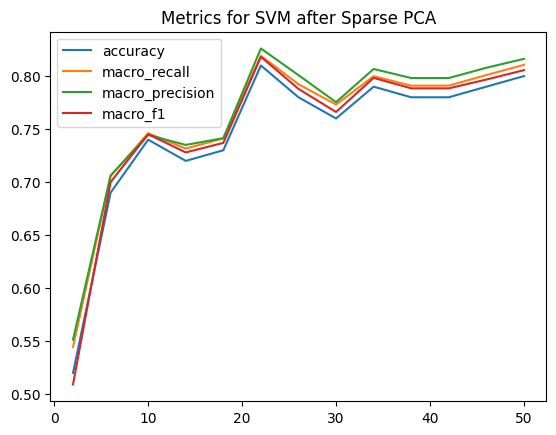

In [39]:
plt.plot(range(2, 51, 4), accuracies, label='accuracy')
plt.plot(range(2, 51, 4), macro_recalls, label='macro_recall')
plt.plot(range(2, 51, 4), macro_precisions, label='macro_precision')
plt.plot(range(2, 51, 4), macro_f1s, label='macro_f1')
plt.title("Metrics for SVM after Sparse PCA")
plt.legend()
plt.show()

In [40]:
from sklearn import random_projection

accuracies = []
macro_recalls = []
macro_precisions = []
macro_f1s = []

for k in range(2, 51, 4):
    transformer = random_projection.GaussianRandomProjection(n_components=k)
    transformer.fit(train_df)
    pca_data = transformer.transform(train_df)
    #pca_target = pca.transform(train_target)
    pca_test = transformer.transform(test_df)

    svm = SVC()

    svm_pca = svm.fit(pca_data, train_target)
    pred_pca = svm.predict(pca_test)

    acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_pca)
    accuracies.append(acc)
    macro_recalls.append(macro_rec)
    macro_precisions.append(macro_pre)
    macro_f1s.append(macro_f1)
    print("%d: Accuracy: " %k, "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
            "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

2: Accuracy:  0.3600  Macro_Recall:  0.3730  Macro_Precision:  0.3246  Macro_F1:  0.3196
6: Accuracy:  0.4400  Macro_Recall:  0.4482  Macro_Precision:  0.4529  Macro_F1:  0.4371
10: Accuracy:  0.5600  Macro_Recall:  0.5661  Macro_Precision:  0.5560  Macro_F1:  0.5592
14: Accuracy:  0.6100  Macro_Recall:  0.6283  Macro_Precision:  0.6039  Macro_F1:  0.6018
18: Accuracy:  0.6700  Macro_Recall:  0.6805  Macro_Precision:  0.6778  Macro_F1:  0.6737
22: Accuracy:  0.7500  Macro_Recall:  0.7553  Macro_Precision:  0.7579  Macro_F1:  0.7547
26: Accuracy:  0.7100  Macro_Recall:  0.7201  Macro_Precision:  0.7206  Macro_F1:  0.7200
30: Accuracy:  0.7200  Macro_Recall:  0.7333  Macro_Precision:  0.7323  Macro_F1:  0.7303
34: Accuracy:  0.6900  Macro_Recall:  0.6972  Macro_Precision:  0.7097  Macro_F1:  0.7023
38: Accuracy:  0.7500  Macro_Recall:  0.7554  Macro_Precision:  0.7687  Macro_F1:  0.7597
42: Accuracy:  0.6900  Macro_Recall:  0.7030  Macro_Precision:  0.6979  Macro_F1:  0.6980
46: Accuracy

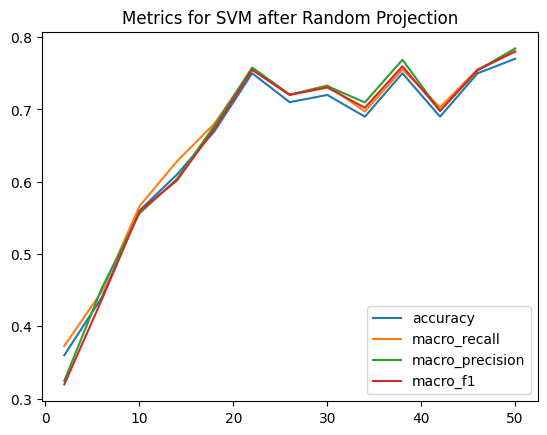

In [41]:
plt.plot(range(2, 51, 4), accuracies, label='accuracy')
plt.plot(range(2, 51, 4), macro_recalls, label='macro_recall')
plt.plot(range(2, 51, 4), macro_precisions, label='macro_precision')
plt.plot(range(2, 51, 4), macro_f1s, label='macro_f1')
plt.title("Metrics for SVM after Random Projection")
plt.legend()
plt.show()

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

accuracies = []
macro_recalls = []
macro_precisions = []
macro_f1s = []

regs = [(10**(-4)) * (1.3**k) for k in range(50)]
print(regs)

for C in regs:
        lr = LogisticRegression(penalty='l1', C = C, max_iter=10000, solver='saga')
        lr.fit(train_df, train_target)
        pred_pca = lr.predict(test_df)

        acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_pca)
        accuracies.append(acc)
        macro_recalls.append(macro_rec)
        macro_precisions.append(macro_pre)
        macro_f1s.append(macro_f1)
        print("%f: Accuracy: " %C, "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
                "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)
        print(len(lr.coef_[0].nonzero()[0]))
        print(len(lr.coef_[1].nonzero()[0]))
        print(len(lr.coef_[2].nonzero()[0]))
        print(len(lr.coef_[3].nonzero()[0]))
        #print(lr.coef_)

[0.0001, 0.00013000000000000002, 0.00016900000000000002, 0.00021970000000000003, 0.00028561000000000005, 0.0003712930000000001, 0.0004826809000000001, 0.0006274851700000002, 0.0008157307210000003, 0.0010604499373000004, 0.0013785849184900006, 0.0017921603940370006, 0.002329808512248101, 0.0030287510659225314, 0.003937376385699291, 0.005118589301409078, 0.006654166091831802, 0.008650415919381343, 0.011245540695195747, 0.01461920290375447, 0.019004963774880812, 0.024706452907345057, 0.032118388779548576, 0.04175390541341315, 0.0542800770374371, 0.07056410014866824, 0.0917333301932687, 0.11925332925124932, 0.1550293280266241, 0.20153812643461136, 0.2619995643649948, 0.3405994336744932, 0.4427792637768412, 0.5756130429098936, 0.7482969557828617, 0.9727860425177202, 1.2646218552730364, 1.6440084118549472, 2.1372109354114315, 2.778374216034861, 3.6118864808453197, 4.695452425098916, 6.104088152628591, 7.935314598417167, 10.31590897794232, 13.410681671325015, 17.43388617272252, 22.66405202453

/home/nuno/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nuno/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nuno/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nuno/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:

0.041754: Accuracy:  0.7000  Macro_Recall:  0.7192  Macro_Precision:  0.7062  Macro_F1:  0.6862
3
3
4
1
0.054280: Accuracy:  0.7400  Macro_Recall:  0.7559  Macro_Precision:  0.7507  Macro_F1:  0.7347
4
4
6
1
0.070564: Accuracy:  0.7700  Macro_Recall:  0.7836  Macro_Precision:  0.7790  Macro_F1:  0.7768
4
4
8
6
0.091733: Accuracy:  0.7800  Macro_Recall:  0.7895  Macro_Precision:  0.7975  Macro_F1:  0.7923
5
6
9
10
0.119253: Accuracy:  0.8000  Macro_Recall:  0.8084  Macro_Precision:  0.8177  Macro_F1:  0.8113
6
7
11
15
0.155029: Accuracy:  0.8200  Macro_Recall:  0.8274  Macro_Precision:  0.8356  Macro_F1:  0.8296
13
10
16
18
0.201538: Accuracy:  0.8100  Macro_Recall:  0.8184  Macro_Precision:  0.8264  Macro_F1:  0.8199
13
12
19
19
0.262000: Accuracy:  0.8000  Macro_Recall:  0.8095  Macro_Precision:  0.8174  Macro_F1:  0.8100
13
13
22
17
0.340599: Accuracy:  0.8100  Macro_Recall:  0.8191  Macro_Precision:  0.8257  Macro_F1:  0.8185
17
17
25
21
0.442779: Accuracy:  0.8200  Macro_Recall:  0